In [11]:
from IPython.display import SVG, Math
from fractions import Fraction as F
import matplotlib.pyplot as plt
import random

# Bài tập 2

**THỐNG KÊ MÁY TÍNH VÀ ỨNG DỤNG (ĐTTX)**

*Họ tên sinh viên: Bùi Phúc Kiển* <br>
*MSSV: 20880034*

## Câu 2.
Một khu phố có 10000 người. Trong số này có:
    <ul >
        <li>3000 người trẻ,</li>
        <li>4600 người nam,</li>
        <li>7000 người đã kết hôn,</li>
        <li>1320 người nam trẻ,</li>
        <li>3010 người nam đã kết hôn,</li>
        <li>1400 người trẻ đã kết hôn,</li>
        <li>600 người nam trẻ đã kết hôn,</li>
    </ul>
Chọn ngẫu nhiên một người trong khu phố, tính xác suất người đó là nữ trẻ độc thân.

### Bài làm

Gọi <br>
A: "Chọn được người trẻ" <br>
B: "Chọn được người đã kết hôn" <br>
C: "Chọn được người nam" <br>
Số người nam trẻ độc thân là $n\left( {CA{B^C}} \right) = 1320 - 600 = 720$ <br>
Số người nữ trẻ độc thân là $n\left( {{C^C}A{B^C}} \right) = 3000 - 1400 - 720 = 880$ <br>
Xác suất chọn được người nữ trẻ độc thân là: $P\left( {{C^C}A{B^C}} \right) = \frac{{880}}{{10000}} = 0.088$

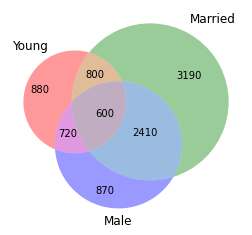

In [12]:
from matplotlib_venn import venn3
venn3(subsets = (880, 3190, 800, 870, 720, 2410, 600), set_labels = ('Young', 'Married', 'Male'))
plt.show()

### Kiểm tra kết quả bằng phương pháp mô phỏng

In [13]:
#Lớp đối tượng để tạo người trong khu phố
class Individual:
    #instances danh sách lưu tất cả các instance (người) được tạo ra
    instances = []
    
    """
    Mỗi cá nhân sẽ có các thuộc tính:
        - stage: 1 - trẻ, 0 - già (không trẻ)
        - gender: 1 - nam, 0 - nữ
        - martial_status: 1 - đã kết hôn, 0 - độc thân
    """
    def __init__(self, stage = 0, gender = 0, martial_status = 0):
        self.stage = stage
        self.gender = gender
        self.martial_status = martial_status
        #Lưu vào instances mỗi cá nhân được tạo ra
        Individual.instances.append(self)
        
#Tạo 10_000 người
for i in range(10_000):
    Individual()

#Tạo 3_000 người trẻ từ 1000 người => Chọn 3_000 người từ 10_000 và gán thuộc tính stage = 1
youngs = random.sample(Individual.instances, k=3000)
for young in youngs:
    young.stage = 1
    
#Tạo 1_400 người trẻ đã kết hôn => Chọn 1_400 người từ 3_000 người trẻ và gán thuộc tính martial_status = 1
young_marrieds = random.sample(youngs, 1_400)
for young_married in young_marrieds:
    young_married.martial_status = 1
    
#Tạo 600 người nam trẻ đã kết hôn => Chọn 600 người từ 1_400 người trẻ đã kết hôn và gán thuộc tính gender = 1
male_young_marrieds = random.sample(young_marrieds, 600)
for male_young_married in male_young_marrieds:
    male_young_married.gender = 1
    
"""
Có 1320 người nam trẻ. 600 người nam trẻ đã kết hôn.
==> Số người nam trẻ độc thân là 1320 - 600 = 720
"""
#Trẻ độc thân = Trẻ - Trẻ đã kết hôn
young_singles = [person for person in youngs if (person not in young_marrieds)]
#Tạo 720 người nam trẻ độc thân => Chọn 720 người từ young_singles và gán thuộc tính gender=0
male_young_singles = random.sample(young_singles, 720)
for male_young_single in male_young_singles:
    male_young_single.gender = 1
    
"""
Thực hiện phép thử n lần.
Mỗi lần chọn 1 người.
Đếm số lần chọn được người là nử trẻ độc thân (gender == 0 && stage == 1 && martial_status == 0), chia cho n
"""
def prob(n):
    count = 0
    for i in range(n):
        #Chọn một người của khu phố
        choosed_person = random.choice(Individual.instances) 
        #Kiểm tra xem người đó có phải là nử trẻ độc thân không
        if(choosed_person.gender == 0 and choosed_person.stage == 1 and choosed_person.martial_status == 0):
            count += 1
    return count/n

for i in range(100_000, 1_000_000, 100_000):
    print(prob(i), sep = "  ")

0.0877
0.088665
0.08747
0.0878075
0.08809
0.08818666666666666
0.08832714285714285
0.088515
0.08852666666666667
